# Covid-19 Prediction Analysis Using Time Series Model

The methodology used in this project consisted of modeling cases of confirmed diagnoses of COVID-19 worldwide(123 countries) using Facebook Prophet model, graph prediction, and cross-validatiion changes in trends for time-dependent count data. Additionally, I evaluated the accuracy of the predictions using a performance Metrics.

 The Project is divided into3 parts: Data Acquisition, Data Cleaning, Prediction, and Visualization

The dataset has been collected from WHO's webpage.

# Data Acquisition

In [1]:
#for prediction work
import fbprophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [23]:
#for addition work
from fbprophet import Prophet
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

After importing the necessery Python libraries, it's time to import the Dataset.

In [5]:
df=DataFrame(pd.read_csv('covid_19_clean_complete.csv'))
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# Data Cleaning

The next part of the work is to clean the dataset in a way that it's usable for creating model for Prediction.

In [6]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Date'])
##summing all the missing Values
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

changing the Date Datatype for easier use and adding all the missing values to get rid of unnessery  datas.

In [10]:
#finding out the unique dates
df['Date'].nunique()

188

creating a new pivot dataset by arranging in order of date and diving into confirmed, Deaths and Recorvered around the world

In [11]:

total_cases=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
total_cases

<ipython-input-11-393bd9e3ac97>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cases=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()


,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


Now, applying the Facebook Orophet in the dataset to create a model to work with while renaming date column by ds and confirmed cases as Y
(since Prophet Modelling Requires an ds Vs Y dataset) and then fitting the new and improved dataset under 'Model'. Then we'll work on Future Prediction by dividing it into Seasonalities.

In [12]:
#Apply Prophet model on Data
df_prophet=total_cases.rename(columns={'Date':'ds','Confirmed':'y'})
m=Prophet()
model=m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
#creating Data for future prediction
model.seasonalities


OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [14]:
future_global=model.make_future_dataframe(periods=30,freq='D')
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


Data Cleaning is now completed

# Prediction & Visualization

In [15]:
#prediction for future data
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.063986e+04,-1.261507e+05,8.632714e+04,-1.063986e+04,-1.063986e+04,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,0.0,0.0,0.0,-2.162230e+04
1,2020-01-23,-7.901275e+03,-1.124903e+05,9.480858e+04,-7.901275e+03,-7.901275e+03,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,0.0,0.0,0.0,-8.977945e+03
2,2020-01-24,-5.162694e+03,-9.954272e+04,1.234434e+05,-5.162694e+03,-5.162694e+03,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,0.0,0.0,0.0,4.934777e+03
3,2020-01-25,-2.424113e+03,-9.447651e+04,1.218945e+05,-2.424113e+03,-2.424113e+03,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,1.131731e+04
4,2020-01-26,3.144674e+02,-1.024968e+05,1.156963e+05,3.144674e+02,3.144674e+02,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,7.551169e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144058e+07,2.102908e+07,2.182658e+07,2.106597e+07,2.178680e+07,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,2.145432e+07
214,2020-08-23,2.164466e+07,2.123969e+07,2.204545e+07,2.124366e+07,2.201341e+07,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,2.165190e+07
215,2020-08-24,2.184875e+07,2.141267e+07,2.227108e+07,2.142413e+07,2.224898e+07,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,0.0,0.0,0.0,2.184658e+07
216,2020-08-25,2.205283e+07,2.156169e+07,2.248824e+07,2.160282e+07,2.248209e+07,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,0.0,0.0,0.0,2.203598e+07


In [16]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145432e+07,2.102908e+07,2.182658e+07
214,2020-08-23,2.165190e+07,2.123969e+07,2.204545e+07
215,2020-08-24,2.184658e+07,2.141267e+07,2.227108e+07
216,2020-08-25,2.203598e+07,2.156169e+07,2.248824e+07
217,2020-08-26,2.224593e+07,2.174254e+07,2.272054e+07


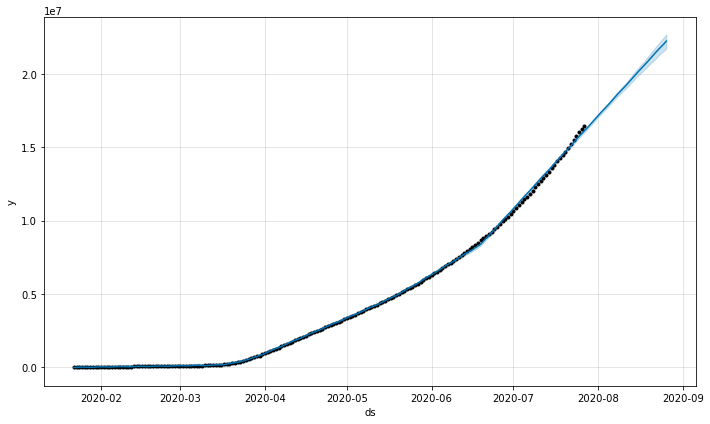

In [17]:
#visualizing the model
model.plot(prediction);

Next, I created a forecasting Model with future dates(addition 30 days) and chosing only confirmed cases column to work with and predict the model for future confirmed cases. Then after plotthing the predicted model, its divided into 3 different colours. the Black dots are the actual data found from the table and the blue  line indicating the trend it will follow. the light blue line at the top right indicates the predicted month/ future data.
We can easily conclude, that the graph is increasing exponentially, meaning Covid-19 cases will rise exponentially and thus , have to use Exponential Distribution for more Statistical analysis on the curve.




Visualizing each and every component of prediction to say what exactly is the trend and then visualizing it in a weekly fashion as well will result in better evaluation.

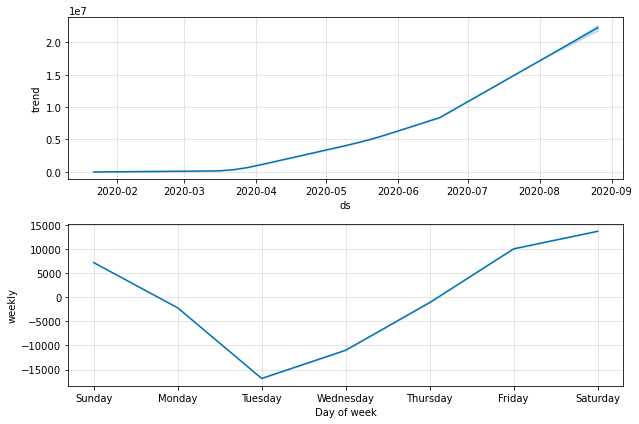

In [18]:
model.plot_components(prediction);

Grouping the prediction plot by week and day and then plotting it, and analyzing the graph i can say, around Wednesday Trend changes and weekly the trend fluctuates.


So what are the points the trend changes?


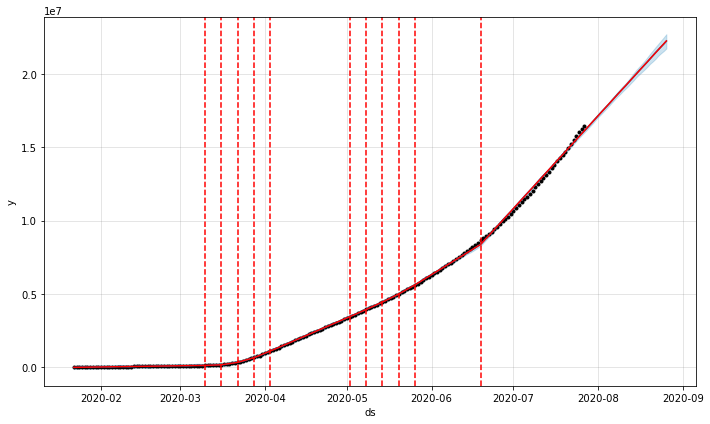

In [19]:
fig=model.plot(prediction)
a=add_changepoints_to_plot(fig.gca(),model,prediction)

using the changepoints function, i calculated where the trend changes.

Since I'm working with Time Series Data, i'll apply cross validation for a 30 day interval, which makes forecasts from the cutoff points, until initial point is reached. with this, i'll get a row of datapoints with the cut off parameters, with 150x6 matrix

In [21]:
#cross validatiing the time series model
df_cv=cross_validation(model, horizon='30 days',period='15 days',initial='90 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196190e+06,3.206196e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279527e+06,3.291078e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361007e+06,3.377573e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439319e+06,3.462088e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.514368e+06,3.546274e+06,3515244,2020-04-28


In [22]:
#obtaining perfomance matrix for the data
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.732177e+10,165292.978537,129431.475977,0.016894,0.017781,0.000000
1,4 days,3.783770e+10,194519.153621,151640.363022,0.019358,0.022609,0.000000
2,5 days,5.187132e+10,227752.759122,175493.706735,0.021809,0.025662,0.066667
3,6 days,6.958295e+10,263785.805797,202488.978430,0.024588,0.026660,0.133333
4,7 days,9.037899e+10,300630.981552,232841.149368,0.027870,0.031220,0.200000


Lastly, i obtained the performance metrics for the model using performance metrics function, with values containing root mean square, root mean square errors, Mean square error, mean avaerage error and more

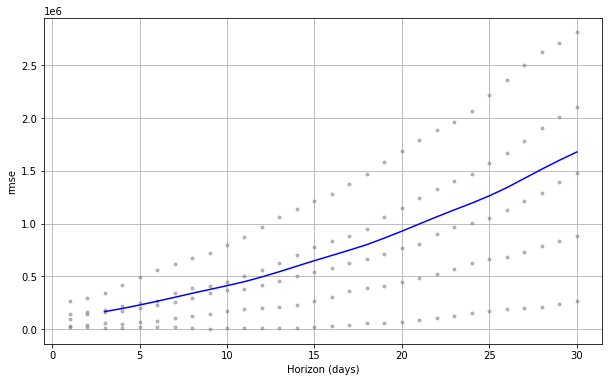

In [24]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

Ploting the root mean square error, it is seen thst rmse is very low i.e., around 1.5. which indicated that this model is a good Prediction model.

Hence, the Prediction Analysis is complete.